# Understanding Descriptive Statistics

Import the necessary libraries here:

In [101]:
%matplotlib inline

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [102]:
def roll_dice(nb_rolls = 10):
    dice_values = [i for i in range(1,7)]
    return random.choices(dice_values, k = nb_rolls)

df = pd.DataFrame(roll_dice(), columns = ['value'])
df

,value
0,4
1,6
2,4
3,3
4,3
5,6
6,1
7,4
8,5
9,2


#### 2.- Plot the results sorted by value.

<AxesSubplot:>

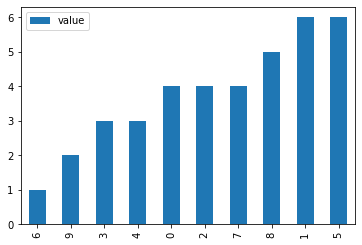

In [103]:
df.sort_values(by = 'value').plot(kind = 'bar')

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

<AxesSubplot:xlabel='value'>

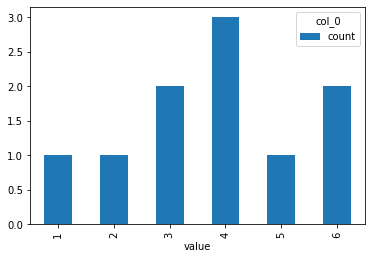

In [104]:
df_freq_dist = pd.crosstab(index=df.value, columns='count')
df_freq_dist.plot(kind = 'bar')

In [105]:
"""
This plot counts the number of bars by value from the plot above.
"""

'\nThis plot counts the number of bars by value from the plot above.\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [106]:
def custom_mean(obss):
    return sum([obs for obs in obss]) / len(obss)

custom_mean(df.value)

3.8

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [107]:
def custom_mean_from_freq(df_freq_dist):
    nb_obss = df_freq_dist.values.sum()
    s_obss = 0
    for i in range(len(df_freq_dist.index)):
        s_obss += df_freq_dist.index[i] * df_freq_dist.values[i]
    custom_mean = s_obss / nb_obss # is an array
    return custom_mean[0] # returns float

custom_mean_from_freq(df_freq_dist)

3.8

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [108]:
def custom_median(obss):
    l_obss = obss.to_list()
    l_obss.sort() # ascending
    nb_obss = len(l_obss)
    if nb_obss % 2 ==1: # odd number of observations
        custom_median = l_obss[int((nb_obss+1)/2 - 1)] # -1 as 0-indexing
    else:
        custom_median = (l_obss[int((nb_obss)/2 - 1)] + l_obss[int((nb_obss)/2)]) / 2
    return custom_median

custom_median(df.value)

4.0

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [109]:
def custom_quartiles(obss):
    l_obss = obss.to_list()
    l_obss.sort() # ascending 
    nb_obss = len(l_obss)
    
    # Q1
    if (nb_obss + 3) % 4 == 0:
        q1 = l_obss[int((nb_obss + 3) / 4)]
    else:
        q1_rinf = int((nb_obss + 3) / 4)
        q1_rsup = int((nb_obss + 3) / 4) + 1
        if (nb_obss + 3) % 4 == 1:
            q1 = (l_obss[q1_rinf] * 3 + l_obss[q1_rinf] * 1) / 4
        elif (nb_obss + 3) % 4 == 2:
            q1 = (l_obss[q1_rinf] * 2 + l_obss[q1_rinf] * 2) / 4
        elif (nb_obss + 3) % 4 == 3:
            q1 = (l_obss[q1_rinf] * 1 + l_obss[q1_rinf] * 3) / 4
    
    #Q2
    q2 = custom_median(obss)
    
    #Q3
    if (3 * nb_obss + 1) % 4 == 0:
        q3 = l_obss[int((3 * nb_obss + 1) / 4)]
    else:
        q3_rinf = int((3 * nb_obss + 1) / 4)
        q3_rsup = int((3 * nb_obss + 1) / 4) + 1
        if (3 * nb_obss + 1) % 4 == 1:
            q3 = (l_obss[q3_rinf] * 3 + l_obss[q3_rinf] * 1) / 4
        elif (3 * nb_obss + 1) % 4 == 2:
            q3 = (l_obss[q3_rinf] * 2 + l_obss[q3_rinf] * 2) / 4
        elif (3 * nb_obss + 1) % 4 == 3:
            q3 = (l_obss[q3_rinf] * 1 + l_obss[q3_rinf] * 3) / 4
    
    #Q4
    q4 = l_obss[-1] # last value
    
    return (q1, q2, q3, q4)

custom_quartiles(df.value)

(3.0, 4.0, 5.0, 6)

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

<AxesSubplot:xlabel='roll'>

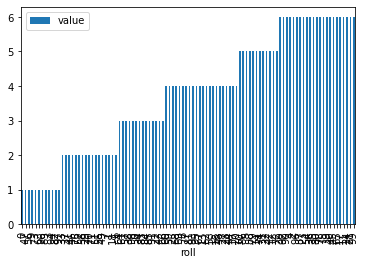

In [110]:
df = pd.read_csv('./data/roll_the_dice_hundred.csv', index_col = 0)
df.set_index('roll', inplace = True)
df.sort_values(by = 'value').plot(kind = 'bar')

In [111]:
"""
4s and 6s are the most frequent values.
The roll values are skewed to the right.
"""

'\n4s and 6s are the most frequent values.\nThe roll values are skewed to the right.\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [112]:
custom_mean(df.value)

3.74

#### 3.- Now, calculate the frequency distribution.


In [113]:
df_freq_dist = pd.crosstab(index=df.value, columns='count')
df_freq_dist

col_0,count
value,
1,12
2,17
3,14
4,22
5,12
6,23


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

array([[<AxesSubplot:title={'center':'value'}>]], dtype=object)

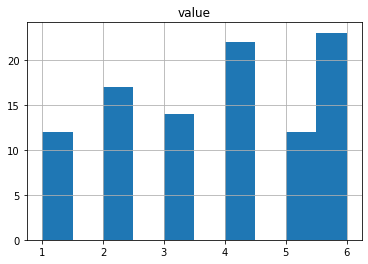

In [114]:
df.hist()

In [115]:
"""
4s and 6s are the most frequent values.
The roll values are skewed to the right.
The 'normal' value of the mean should be 3.5 (if rolls value were equally distributed)
while it is actually 3.74, showing the negative skew (i.e. skewed to the right).
"""

"\n4s and 6s are the most frequent values.\nThe roll values are skewed to the right.\nThe 'normal' value of the mean should be 3.5 (if rolls value were equally distributed)\nwhile it is actually 3.74, showing the negative skew (i.e. skewed to the right).\n"

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

array([[<AxesSubplot:title={'center':'value'}>]], dtype=object)

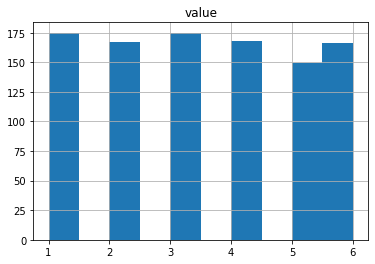

In [116]:
df = pd.read_csv('./data/roll_the_dice_thousand.csv', index_col = 0)
df.set_index('roll', inplace = True)
df.hist()

In [117]:
"""
The distribution profile / shape is much more balanced: no skew.
"""

'\nThe distribution profile / shape is much more balanced: no skew.\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [118]:
df1 = pd.read_csv('./data/ages_population.csv')
df1.value_counts()

observation
39.0           45
41.0           36
30.0           34
35.0           33
43.0           32
               ..
69.0            1
70.0            1
71.0            1
73.0            1
82.0            1
Length: 72, dtype: int64

<AxesSubplot:ylabel='Count'>

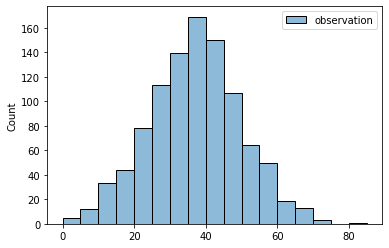

In [119]:
sns.histplot(df1, binwidth = 5, binrange = (0,df1.observation.max()))
# The mean should be between 35 and 45
# The standard deviation should be between 10 to 15

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [120]:
print(f'Mean = {np.mean(df1.observation)}')
print(f'Standard deviation = {np.std(df1.observation)}')

Mean = 36.56
Standard deviation = 12.81008977329979


In [121]:
"""
They fall within the ranges I guessed.
"""

'\nThey fall within the ranges I guessed.\n'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [122]:
df2 = pd.read_csv('./data/ages_population2.csv')
df2.value_counts()

observation
28.0           139
27.0           125
26.0           120
29.0           115
25.0            98
30.0            90
24.0            78
31.0            61
23.0            41
22.0            35
32.0            31
33.0            22
21.0            17
20.0            13
34.0             7
35.0             3
19.0             3
36.0             2
dtype: int64

<AxesSubplot:ylabel='Count'>

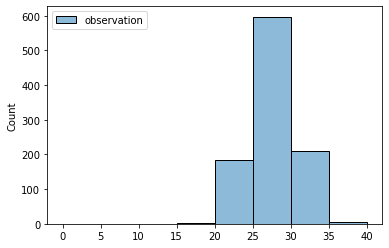

In [123]:
sns.histplot(df2, binwidth = 5, binrange = (0,df2.observation.max()))

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [124]:
"""
Almost all people in this sample are aged between 20 and 35.
"""

'\nAlmost all people in this sample are aged between 20 and 35.\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [125]:
print(f'Mean = {np.mean(df2.observation)}')
print(f'Standard deviation = {np.std(df2.observation)}')

Mean = 27.155
Standard deviation = 2.9683286543103704


In [126]:
"""
Mean is lower and standard deviation much lower.
Either this neighbourhood only accomodates young adults, or only yound adults from this neighbourhood
answered the pool (more convenient for pollsters?).
"""

'\nMean is lower and standard deviation much lower.\nEither this neighbourhood only accomodates young adults, or only yound adults from this neighbourhood\nanswered the pool (more convenient for pollsters?).\n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [127]:
df3 = pd.read_csv('./data/ages_population3.csv')
df3.value_counts()

observation
32.0           37
37.0           31
35.0           31
39.0           29
36.0           26
               ..
8.0             1
7.0             1
5.0             1
76.0            1
1.0             1
Length: 75, dtype: int64

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

<AxesSubplot:ylabel='Count'>

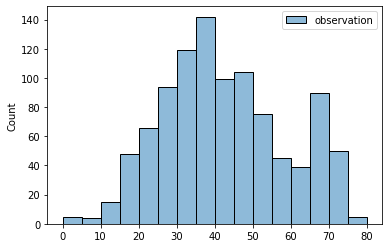

In [128]:
sns.histplot(df3, binwidth = 5, binrange = (0,df3.observation.max()))

In [129]:
"""
Many older people (>60) appear in the sample compared to step 1.
They seem like outliers compared to a normal distribution.
Did pollsters receive specific instructions to survey senior people, or is there something particularly
appealing to older people in this neighbourhood?
"""

'\nMany older people (>60) appear in the sample compared to step 1.\nThey seem like outliers compared to a normal distribution.\nDid pollsters receive specific instructions to survey senior people, or is there something particularly\nappealing to older people in this neighbourhood?\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [130]:
df3.describe()

,observation
count,1000.000000
mean,41.989000
std,16.144706
min,1.000000
25%,30.000000
50%,40.000000
75%,53.000000
max,77.000000


In [131]:
"""
Difference between the median and the mean is about 2 years (mean is higher).
This demonstrates a skew to the right due to the older people.
"""

'\nDifference between the median and the mean is about 2 years (mean is higher).\nThis demonstrates a skew to the right due to the older people.\n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [132]:
for i in range(1,11):
    print(f' Percentile {i/10 * 100}% : {np.percentile(df3, i/10 * 100)}')

 Percentile 10.0% : 22.0
 Percentile 20.0% : 28.0
 Percentile 30.0% : 32.0
 Percentile 40.0% : 36.0
 Percentile 50.0% : 40.0
 Percentile 60.0% : 45.0
 Percentile 70.0% : 50.0
 Percentile 80.0% : 57.0
 Percentile 90.0% : 67.0
 Percentile 100.0% : 77.0


In [133]:
"""
Starting 70%, we see that the interpercentile range increases a lot, from 5 years to 10 years ultimately.
"""

'\nStarting 70%, we see that the interpercentile range increases a lot, from 5 years to 10 years ultimately.\n'

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [134]:
print('FIRST SAMPLE')
print(df1.describe())
print('-----------')
print('SECOND SAMPLE')
print(df2.describe())
print('-----------')
print('THIRD SAMPLE')
print(df3.describe())

FIRST SAMPLE
       observation
count    1000.0000
mean       36.5600
std        12.8165
min         1.0000
25%        28.0000
50%        37.0000
75%        45.0000
max        82.0000
-----------
SECOND SAMPLE
       observation
count  1000.000000
mean     27.155000
std       2.969814
min      19.000000
25%      25.000000
50%      27.000000
75%      29.000000
max      36.000000
-----------
THIRD SAMPLE
       observation
count  1000.000000
mean     41.989000
std      16.144706
min       1.000000
25%      30.000000
50%      40.000000
75%      53.000000
max      77.000000


In [135]:
"""
All three samples have 1,000 observations (people surveyed).
1st and 3rd have close means (36.6 vs. 42.2) and medians (37.0 vs. 40.0),
the first sample seems to have a much more normal distribution (mean close to median, std of 12.8)
while the 3rd is skewed to the right due to a multimodal distribution (major 35-40 and minor 65-70).
The 2nd sample (mean 27.2, median 27.0, std 3.0) is very much focused on young adults.
"""

'\nyour comments here\n'